### Load the data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('VolumeAndNVbySymbol_wRand.csv', parse_dates = ['Time'])
df.head()

,Time,SYMBOL_NAME,NV_rand,VOLUME_rand
0,2021-09-20 09:30:00,NYSE_TAQ::A,2.523433e+07,136317.0
1,2021-09-20 09:30:00,NYSE_TAQ::AA,3.253425e+07,721069.0
2,2021-09-20 09:30:00,NYSE_TAQ::AAA,4.796918e+01,2.0
3,2021-09-20 09:30:00,NYSE_TAQ::AAAU,3.942529e+05,23543.0
4,2021-09-20 09:30:00,NYSE_TAQ::AAC,3.458813e+03,364.0


### Step 2. Compute weighted averages of the VOLUME_rand column:<br>
#### 1.The weighted average of VOLUME_rand over the whole dataset, using NV_rand as the weights<br>

In [2]:
df['weighted'] = df['NV_rand'] * df['VOLUME_rand']
df.head(1)

,Time,SYMBOL_NAME,NV_rand,VOLUME_rand,weighted
0,2021-09-20 09:30:00,NYSE_TAQ::A,2.523433e+07,136317.0,3.439869e+12


In [3]:
# Computing the mean over the whole dataset
dataset_weighted = df['weighted'].sum() / df['NV_rand'].sum()
print(f'Weighted average of VOLUME_rand over the whole dataset is {dataset_weighted:,.2f}')

Weighted average of VOLUME_rand over the whole dataset is 932,572.88


In [4]:
# checking with the built in numpy method
# np.average(df['VOLUME_rand'], weights = df['NV_rand'])

#### 2.The lowest weighted average and highest weighted average you can get if you use the “natural” method we outlined in class to sort and them remove about 5% of the weight from the lowest or highest values respectively.<br>


In [5]:
# determine the top threshold using quantiles
top_threshold =  df['weighted'].quantile(0.95)
# print(f'Top threshold: {top_threshold:,.2f}')

# filter out top 5% of the original distribution
bottom95 = df[df['weighted'] < top_threshold]
lowest = bottom95['weighted'].sum() / bottom95['NV_rand'].sum()
print(f'LOWEST weighted average of VOLUME_rand over bottom 95% of the dataset {lowest:,.2f}')

LOWEST weighted average of VOLUME_rand over bottom 95% of the dataset 36,525.64


In [6]:
# determine the bottom threshold using quantiles
bottom_threshold =  df['weighted'].quantile(0.05)
# print(f'Bottom threshold: {bottom_threshold:,.2f}')

# filter out bottom 5% of the original distribution
top95 = df[df['weighted'] > bottom_threshold]
highest = top95['weighted'].sum() / top95['NV_rand'].sum()

print(f'HIGHEST weighted average of VOLUME_rand over bottom 95% of the dataset: {highest:,.2f}')

# checking with the built in numpy method
# highest2 = np.average(top95['VOLUME_rand'], weights = top95['NV_rand'])
# print(f'HIGHEST2 weighted average of VOLUME_rand over bottom 95% of the dataset: {highest2:,.2f}')

HIGHEST weighted average of VOLUME_rand over bottom 95% of the dataset: 932,574.83


Since we weren't able to increase the weighted average in a meaningful way, we would like to check the distribution of the underlying data to make sure that the result actually makes sense:

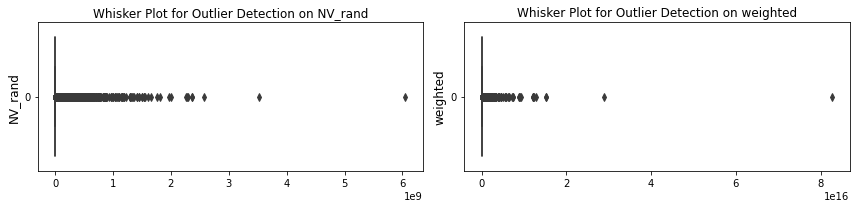

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

columns_to_explore = ['NV_rand', 'weighted']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12, 3))

for i, col_list in enumerate(columns_to_explore):
    sns.boxplot(data = df[col_list], ax = ax[i], palette = "crest", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 12)
    ax[i].set_ylabel(col_list, fontsize = 12)
    ax[i].set(xlabel=None)
    plt.tight_layout()

And it does! As we could see from the box plots above, there are several extremely high values that affected our initial calculations and "draged" the results up. After we removed the top 5% of the distribution in step 2.1, the new weighted average was expected to be much lower compared to the original value. At the same time, since the high outliers reamined after we removed the bottom 5% of the distribution (2.2), recalculated weighted average did not change much.

#### 3.Now aggregate by symbol (using the SYMBOL_NAME column) to compute a weighted average of VOLUME_rand for each symbol, using NV_rand as the weights. Now if you average VOLUME_rand over symbols using NV_rand totals for each symbol as the relative weights, do you get the same result as 1? Discuss why or why not.<br>

In [8]:
by_symbol = df.groupby('SYMBOL_NAME')[['weighted', 'NV_rand']].sum()

#calculating the weighted average based on the aggreagated columns
by_symbol['W_avg'] = by_symbol['weighted'] / by_symbol['NV_rand']

# reseting the index and checking the result
by_symbol.reset_index().head()

,SYMBOL_NAME,weighted,NV_rand,W_avg
0,NYSE_TAQ::A,2.471326e+13,4.184778e+08,59055.131443
1,NYSE_TAQ::AA,4.260295e+14,1.060374e+09,401772.994139
2,NYSE_TAQ::AAA,3.842901e+06,1.777193e+04,216.234284
3,NYSE_TAQ::AAAU,8.690815e+10,6.144971e+06,14142.972351
4,NYSE_TAQ::AAC,7.063531e+11,4.621008e+06,152856.937705


In [9]:
#  average VOLUME_rand over symbols using NV_rand totals for each symbol as the relative weights
by_symbol_weighted = by_symbol['weighted'].sum() / by_symbol['NV_rand'].sum()
print(f'Weighted average of VOLUME_rand over the over symbols is {by_symbol_weighted:,.2f}')

Weighted average of VOLUME_rand over the over symbols is 932,572.88


Since instead of taking an average of an average we continued recalculating the metrics at every step, our final result remained unchanged regardless of whether we arrived to it after calculating over the whole dataset or decided to aggregate by symbols first.